<a href="https://www.kaggle.com/code/bhaveshdhote/notebook67ae3d79fb?scriptVersionId=126185066" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/acme-insurance123/medical-charges.csv


In [2]:
import pandas as pd

In [3]:
medical_df = pd.read_csv('/kaggle/input/acme-insurance123/medical-charges.csv')

In [4]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
!pip install plotly matplotlib seaborn --quiet

In [8]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

In [9]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [10]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [11]:
fig=px.histogram(medical_df, x='age', marginal='box',nbins=47, title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
fig=px.histogram(medical_df,x='bmi', marginal='box', color_discrete_sequence=['orange'],title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [13]:
fig=px.histogram(medical_df,x='charges', marginal='box',color='smoker', color_discrete_sequence=['red','grey'],title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [14]:
fig=px.histogram(medical_df,x='charges', marginal='box',color='sex', color_discrete_sequence=['red','grey'],title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [15]:
fig=px.histogram(medical_df,x='charges', marginal='box',color='region', color_discrete_sequence=['red','grey','pink','yellow'],title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [16]:
medical_df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [17]:
medical_df.region.value_counts()


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [18]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [19]:
fig=px.histogram(medical_df,x='smoker', marginal='box',color='sex', color_discrete_sequence=['pink','yellow'],title='Distribution of Sex who Smokes')
fig.update_layout(bargap=0.1)
fig.show()

In [20]:
fig=px.scatter(
    medical_df,
    x='age',
    y='charges',
    color='smoker',
    opacity=0.8,
    hover_data=['sex'],
    title='Age vs Charges'
)
fig.update_traces(marker_size=5),
fig.show()

In [21]:
fig=px.scatter(medical_df,
              x='bmi',
              y='charges',
              color='smoker',
              opacity=0.8,
              hover_data=['sex'],
              title='Bmi vs Charges')
fig.update_traces(marker_size=5)
fig.show()


In [22]:
fig=px.violin(medical_df,
              x='region',
              y='charges',
              color='smoker',
              hover_data=['sex'],
              title='Region vs Charges')
fig.update_traces(marker_size=5)
fig.show()


In [23]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [24]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [25]:
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

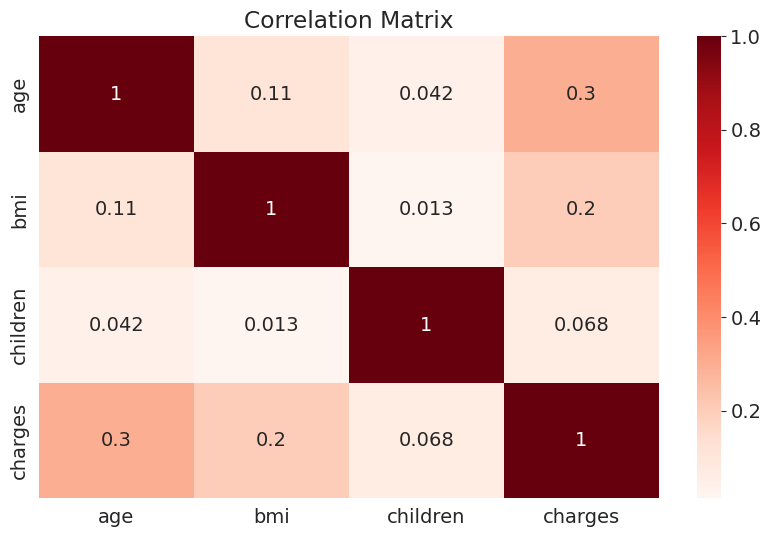

In [26]:
sns.heatmap(medical_df.corr(),cmap='Reds',annot=True)
plt.title('Correlation Matrix')

In [27]:
non_smoker_df=medical_df[medical_df.smoker=='no']

<AxesSubplot:title={'center':'Age vs Charges'}, xlabel='age', ylabel='charges'>

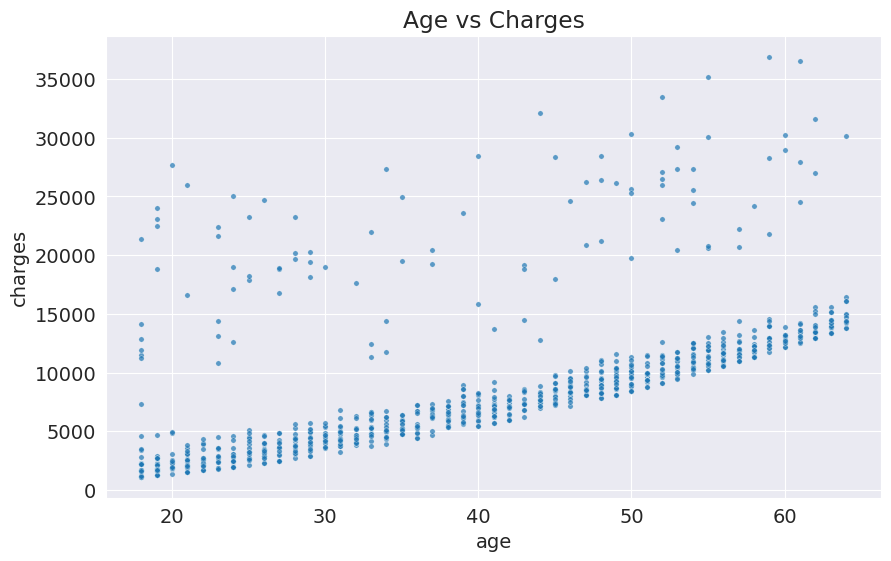

In [28]:
plt.title('Age vs Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15)

In [29]:
w=50
b=100
def estimate_charges(age,w,b):
    return w*age+b
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)


In [30]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);


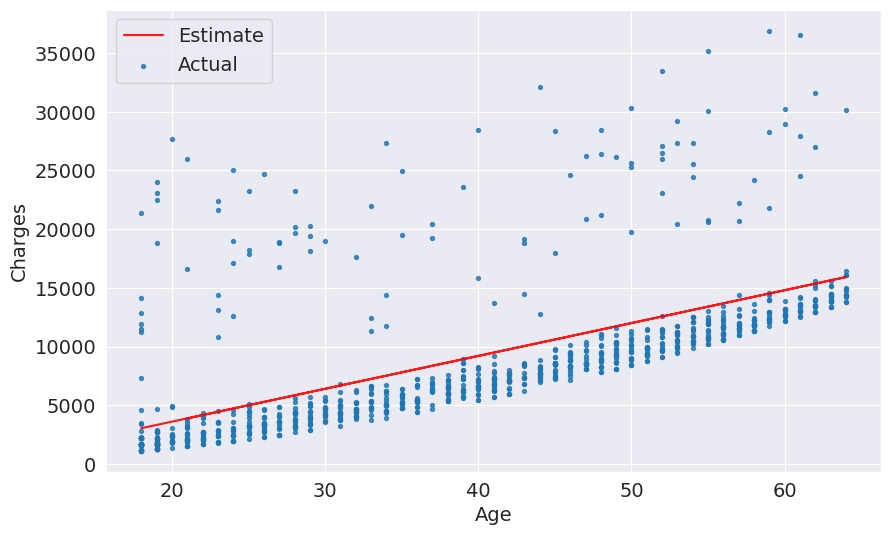

In [31]:
try_parameters(280,-2000)

In [32]:
targets=non_smoker_df.charges
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [33]:
predictions=estimated_charges
predictions

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [34]:
!pip install numpy --quiet

In [35]:
import numpy as np

In [36]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

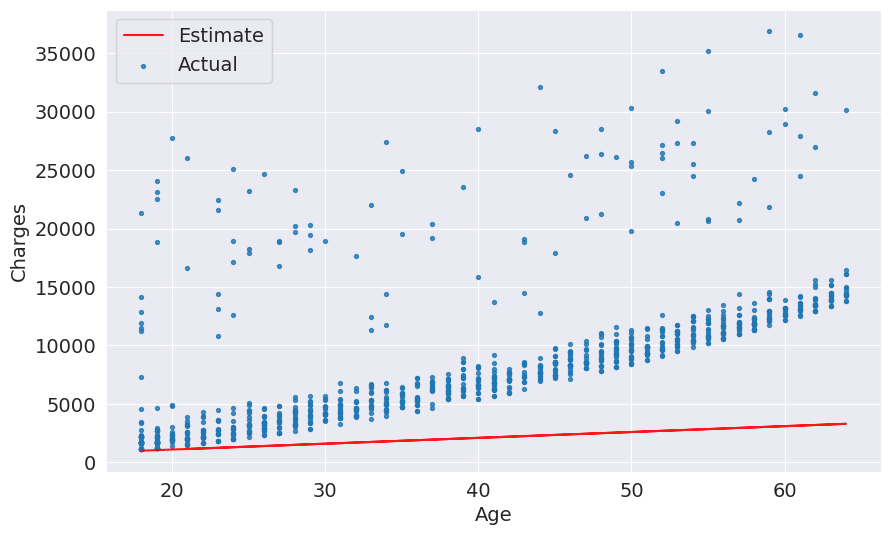

In [37]:
w = 50
b = 100
try_parameters(w, b)

In [38]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [39]:
rmse(targets, predicted)

8461.949562575493

In [40]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  4662.516524487403


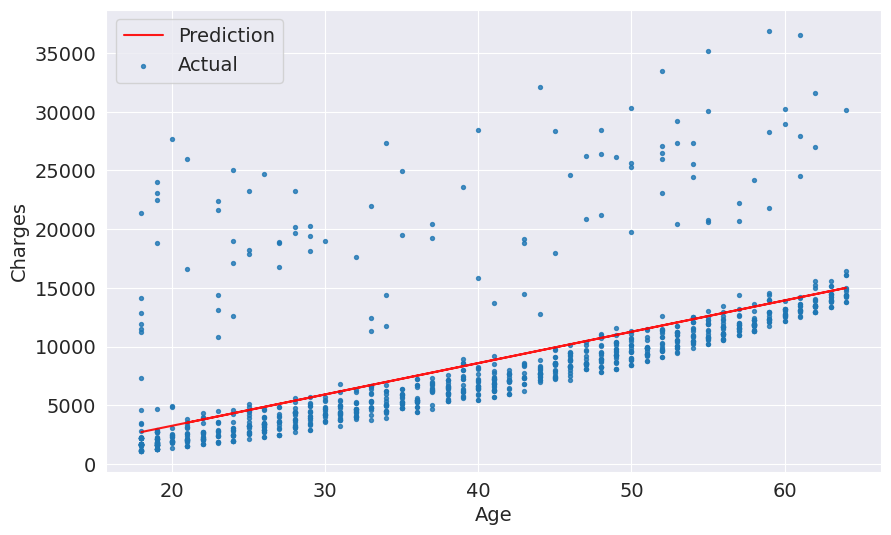

In [41]:
try_parameters(267, -2091)

In [42]:
!pip install scikit-learn --quiet

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
model=LinearRegression()

In [45]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [46]:
inputs=non_smoker_df[['age']]
targets=non_smoker_df.charges
print('inputs.shape:',inputs.shape)
print('targets.shape:',targets.shape)

inputs.shape: (1064, 1)
targets.shape: (1064,)


In [47]:
model.fit(inputs,targets)

LinearRegression()

In [48]:
predictions=model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [49]:
rmse(targets,predictions)

4662.505766636395

In [50]:
model.coef_  #w

array([267.24891283])

In [51]:
model.intercept_   #b 

-2091.4205565650864

RMSE Loss:  4662.505766636395


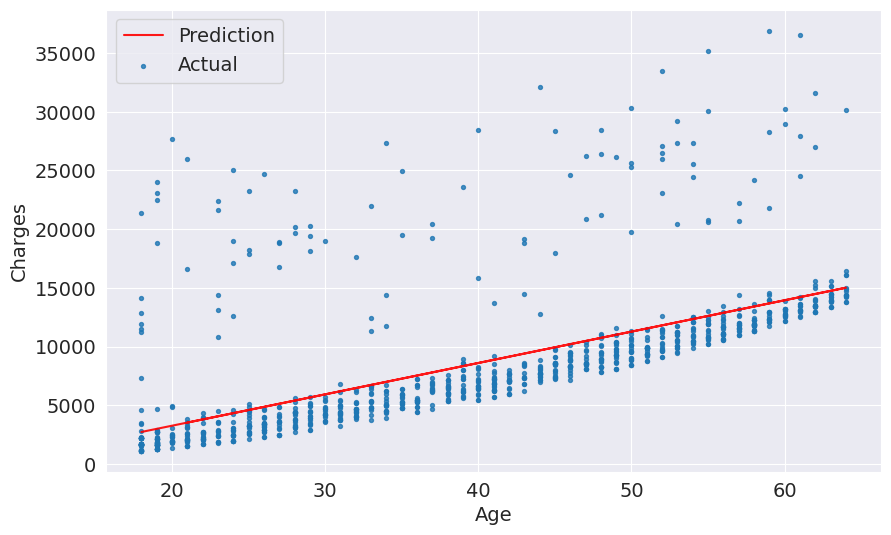

In [52]:
try_parameters(model.coef_,model.intercept_)

In [53]:
smoker_df=medical_df[medical_df.smoker=='yes']

<AxesSubplot:title={'center':'Age vs Charges'}, xlabel='age', ylabel='charges'>

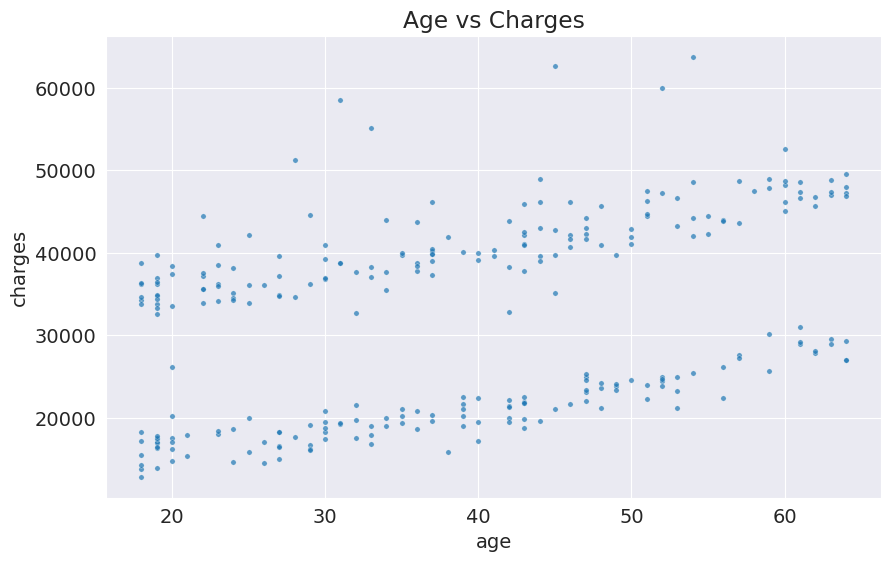

In [54]:
plt.title('Age vs Charges')
sns.scatterplot(data=smoker_df,x='age', y='charges', alpha=0.7, s=15)

In [55]:
w=50
b=100
def estimatee_charges(age,w,b):
    return w*age+b
ages = smoker_df.age
estimatedd_charges = estimatee_charges(ages, w, b)


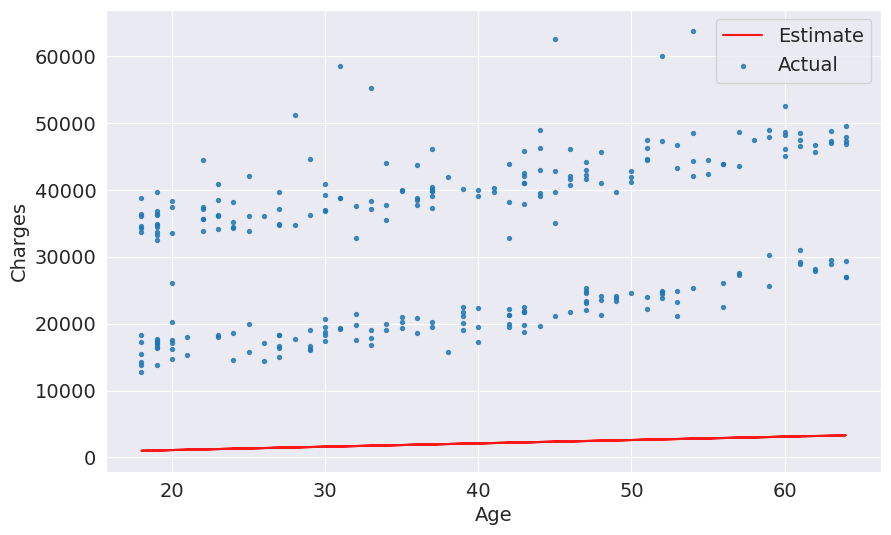

In [56]:
target = smoker_df.charges

plt.plot(ages, estimatedd_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [57]:
def try_parameters(w, b):
    ages = smoker_df.age
    target = smoker_df.charges
    
    estimatedd_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimatedd_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

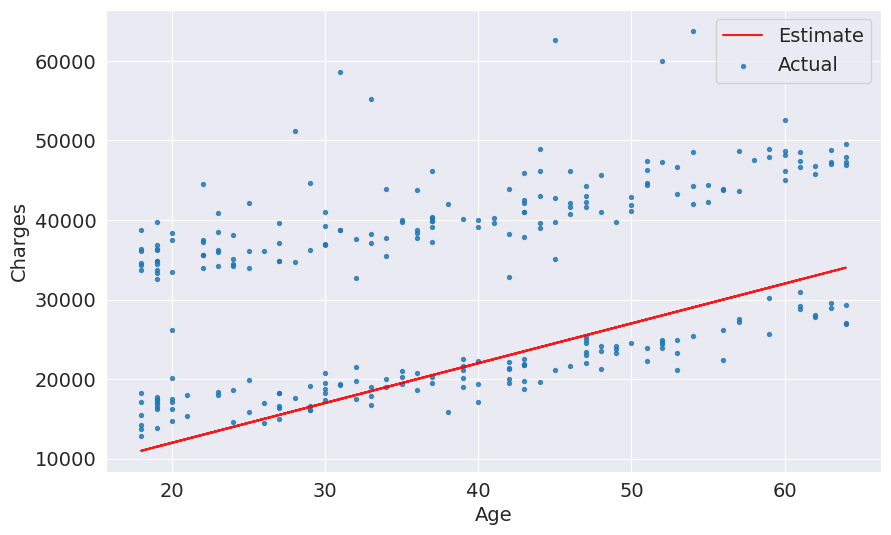

In [58]:
try_parameters(500,2000)

In [59]:
import numpy as np

In [60]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

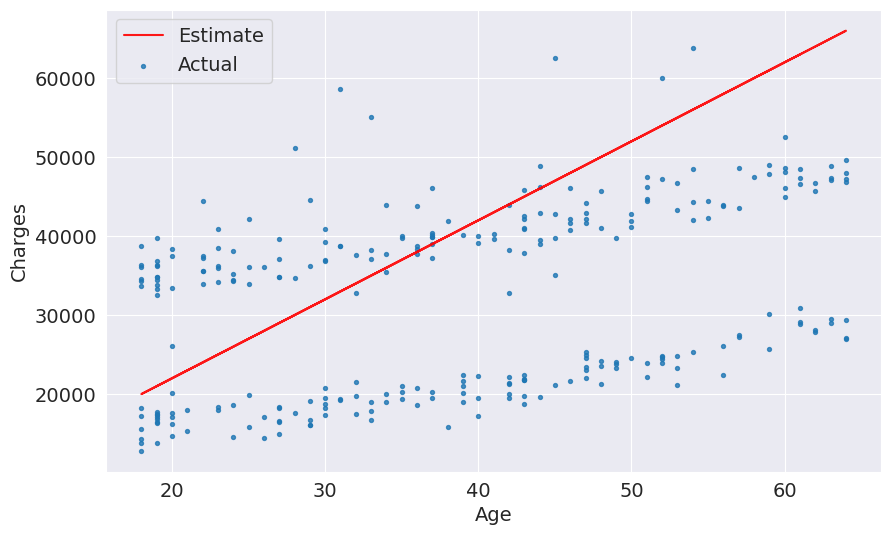

In [61]:
w = 1000
b = 2000
try_parameters(w, b)

In [62]:
targets = smoker_df['charges']
predicted = estimate_charges(smoker_df.age, w, b)

In [63]:
rmse(targets, predicted)

16721.316791168018

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
model = LinearRegression()

In [66]:
inputs = smoker_df[['age']]
targets = smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (274, 1)
targes.shape : (274,)


In [67]:
model.fit(inputs, targets)

LinearRegression()

In [68]:
model.predict(np.array([[23], 
                        [37], 
                        [61]]))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([27314.59297544, 31587.91940498, 38913.62185562])

In [69]:
predictions = model.predict(inputs)
predictions

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

In [70]:
rmse(targets, predictions)

10711.00334810241

In [71]:
model.coef_


array([305.23760211])

In [72]:
model.intercept_

20294.128126915966

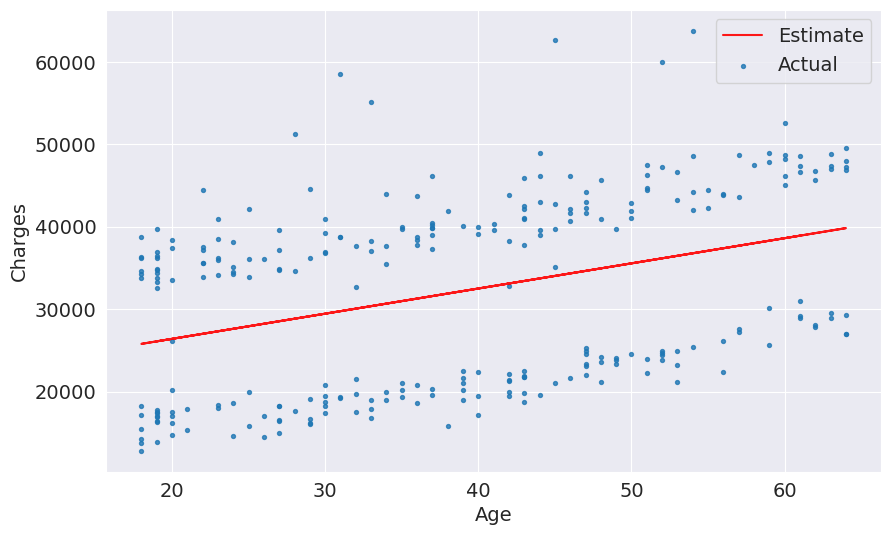

In [73]:
try_parameters(model.coef_, model.intercept_)